# EDA for OpenFace Data

In [1]:
#install the missing libraries
!pip install sweetviz

In [2]:
#import libraries
from graphutil import PlotGraphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import sweetviz as sv
import time
import plotly.io as pio
pio.templates.default = "none"
import warnings

In [3]:
#read the data file
path = "C:\\Work\\606Capstone\\Video_chunks\\Final.csv"
df = pd.read_csv(path)
df

VideoName  mean_AU01  mean_AU02  mean_AU04  mean_AU05  \
0      trial_lie_001_000   0.559135   0.513050   0.254950   0.413367   
1      trial_lie_001_001   0.546610   0.482385   0.292549   0.393281   
2      trial_lie_001_002   0.560753   0.483092   0.291333   0.393530   
3      trial_lie_001_003   0.532220   0.481838   0.321986   0.388174   
4      trial_lie_002_000   0.436142   0.412403   0.371331   0.332483   
..                   ...        ...        ...        ...        ...   
732  trial_truth_060_000   0.496345   0.485515   0.535118   0.406868   
733  trial_truth_060_001   0.422170   0.468637   0.446201   0.508495   
734  trial_truth_060_002   0.515533   0.491938   0.438462   0.551434   
735  trial_truth_060_003   0.469542   0.475879   0.492550   0.457961   
736  trial_truth_060_004   0.532738   0.520756   0.499290   0.475737   

     mean_AU06  mean_AU07  mean_AU09  mean_AU10  mean_AU11  ...  mean_AU28  \
0     0.131757   0.119048   0.210417   0.106673   0.479506  ...   0.137724   
1     0.123315   0.076923   0.182163   0.044325   0.473213  ...   0.103712   
2     0.129316   0.094017   0.184086   0.036360   0.473673  ...   0.111731   
3     0.154953   0.126984   0.256083   0.150329   0.478114  ...   0.153399   
4     0.242381   0.111111   0.288108   0.081820   0.473882  ...   0.086161   
..         ...        ...        ...        ...        ...  ...        ...   
732   0.251973   0.246032   0.375586   0.317093   0.470617  ...   0.061832   
733   0.177772   0.228070   0.292094   0.330395   0.467192  ...   0.041104   
734   0.202776   0.139344   0.341805   0.180777   0.470024  ...   0.059043   
735   0.187666   0.245763   0.367703   0.170327   0.469233  ...   0.063372   
736   0.249443   0.198198   0.384727   0.080069   0.469876  ...   0.049478   

     mean_AU43  mean_anger  mean_disgust  mean_fear  mean_happiness  \
0     0.144841    0.034503      0.004511   0.018815        0.346850   
1     0.110869    0.027199      0.006233   0.015653        0.453637   
2     0.127748    0.028358      0.007122   0.016593        0.468327   
3     0.227434    0.024174      0.002683   0.013205        0.099999   
4     0.207142    0.120490      0.027522   0.039825        0.132332   
..         ...         ...           ...        ...             ...   
732   0.483794    0.317662      0.047535   0.087699        0.050396   
733   0.088334    0.256627      0.011986   0.083970        0.062653   
734   0.132496    0.111543      0.005858   0.142710        0.088277   
735   0.142941    0.245029      0.015846   0.144640        0.164392   
736   0.158766    0.150649      0.049503   0.127929        0.057324   

     mean_sadness  mean_surprise  mean_neutral  Label  
0        0.249029       0.265825      0.080468    lie  
1        0.151641       0.245443      0.100194    lie  
2        0.091021       0.293954      0.094625    lie  
3        0.258340       0.403113      0.198486    lie  
4        0.517453       0.074959      0.087419    lie  
..            ...            ...           ...    ...  
732      0.224306       0.103952      0.168450  truth  
733      0.051118       0.459040      0.074607  truth  
734      0.061379       0.563947      0.026286  truth  
735      0.021705       0.363823      0.044565  truth  
736      0.019860       0.561616      0.033119  truth  

[737 rows x 29 columns]

In [4]:
#get the shape of the datafrme
df.shape

(737, 29)

In [5]:
#Find number of non-null values and data type of each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VideoName       737 non-null    object 
 1   mean_AU01       737 non-null    float64
 2   mean_AU02       737 non-null    float64
 3   mean_AU04       737 non-null    float64
 4   mean_AU05       737 non-null    float64
 5   mean_AU06       737 non-null    float64
 6   mean_AU07       737 non-null    float64
 7   mean_AU09       737 non-null    float64
 8   mean_AU10       737 non-null    float64
 9   mean_AU11       737 non-null    float64
 10  mean_AU12       737 non-null    float64
 11  mean_AU14       737 non-null    float64
 12  mean_AU15       737 non-null    float64
 13  mean_AU17       737 non-null    float64
 14  mean_AU20       737 non-null    float64
 15  mean_AU23       737 non-null    float64
 16  mean_AU24       737 non-null    float64
 17  mean_AU25       737 non-null    flo

In [6]:
#get the summary of the dataset
df.describe()

mean_AU01   mean_AU02   mean_AU04   mean_AU05   mean_AU06   mean_AU07  \
count  737.000000  737.000000  737.000000  737.000000  737.000000  737.000000   
mean     0.416655    0.467410    0.404436    0.418905    0.184911    0.205069   
std      0.074658    0.036116    0.083717    0.072502    0.069933    0.146853   
min      0.231443    0.359584    0.207955    0.250289    0.079295    0.000000   
25%      0.359575    0.445966    0.346847    0.363071    0.128320    0.092308   
50%      0.409721    0.470585    0.388437    0.410689    0.174261    0.170940   
75%      0.463986    0.492236    0.454445    0.464025    0.222434    0.290598   
max      0.633079    0.574856    0.702236    0.672131    0.499566    1.000000   

        mean_AU09   mean_AU10   mean_AU11   mean_AU12  ...   mean_AU26  \
count  737.000000  737.000000  737.000000  737.000000  ...  737.000000   
mean     0.285994    0.224698    0.471379    0.179882  ...    0.322454   
std      0.084336    0.154125    0.004555    0.088975  ...    0.124770   
min      0.114577    0.007370    0.462196    0.030845  ...    0.081276   
25%      0.221705    0.098964    0.468279    0.121133  ...    0.223650   
50%      0.299751    0.196964    0.470857    0.164475  ...    0.316559   
75%      0.342762    0.325472    0.473781    0.217848  ...    0.407051   
max      0.587998    0.778519    0.498725    0.603264  ...    0.705779   

        mean_AU28   mean_AU43  mean_anger  mean_disgust   mean_fear  \
count  737.000000  737.000000  737.000000    737.000000  737.000000   
mean     0.091156    0.244002    0.179700      0.050431    0.064705   
std      0.054646    0.161399    0.214150      0.085329    0.067574   
min      0.019224    0.028336    0.000607      0.000035    0.000031   
25%      0.057612    0.111481    0.022642      0.001699    0.017322   
50%      0.079770    0.202592    0.083287      0.014818    0.044194   
75%      0.107738    0.340704    0.274802      0.056173    0.089079   
max      0.537140    0.953330    0.991705      0.755200    0.439470   

       mean_happiness  mean_sadness  mean_surprise  mean_neutral  
count      737.000000    737.000000     737.000000    737.000000  
mean         0.066041      0.182807       0.213194      0.243122  
std          0.119865      0.200216       0.206943      0.217447  
min          0.000107      0.000300       0.000078      0.001686  
25%          0.004331      0.035230       0.062765      0.066663  
50%          0.017436      0.100948       0.145649      0.155661  
75%          0.058424      0.262932       0.302743      0.380505  
max          0.719855      0.873122       0.977475      0.923243  

[8 rows x 27 columns]

#### Data Clean up and Sanity Checks

From the above analysis it is clear that all the columns have the correct data type and hence there is no need of type casting. We also observe that there are no null values in the dataset.

Let us check whether there are any columns that have same value for all the rows

In [7]:
counter = 0
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


We have a few object type columns. Let us check if we can convert them to any other datatype so that our processing can be faster.

In [8]:
#find number of unique values in various object type columns
count = 10
for col,col_type in df.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',df[col].nunique(),'unique entries; and the top unique values are ')
        print(df[col].value_counts().head(count))


 VideoName has 737 unique entries; and the top unique values are 
trial_lie_001_000      1
trial_truth_011_007    1
trial_truth_010_016    1
trial_truth_010_017    1
trial_truth_011_000    1
trial_truth_011_001    1
trial_truth_011_002    1
trial_truth_011_003    1
trial_truth_011_004    1
trial_truth_011_005    1
Name: VideoName, dtype: int64

 Label has 2 unique entries; and the top unique values are 
lie      390
truth    347
Name: Label, dtype: int64


From the above report it is clear that we can convert the 'Label' to categorical for the ease of processing.

In [9]:
#convert columns to categorical
df['Label'] = df['Label'].astype('category')

Let us now visualize the various statistics (statistical report) for all the variables

In [10]:
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('Advertising.html')

                                             |                                             | [  0%]   00:00 ->…

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Let us now find the correlation between the various parameters

In [11]:
corr_df = df.corr()
corr_df

mean_AU01  mean_AU02  mean_AU04  mean_AU05  mean_AU06  \
mean_AU01        1.000000   0.623549  -0.134760   0.003546  -0.224585   
mean_AU02        0.623549   1.000000  -0.045739   0.012628  -0.224805   
mean_AU04       -0.134760  -0.045739   1.000000  -0.136145  -0.053624   
mean_AU05        0.003546   0.012628  -0.136145   1.000000   0.128962   
mean_AU06       -0.224585  -0.224805  -0.053624   0.128962   1.000000   
mean_AU07       -0.321679  -0.184971   0.129152  -0.089877   0.437918   
mean_AU09       -0.141198  -0.285123   0.253420   0.164110   0.622863   
mean_AU10       -0.357896  -0.289638   0.009066   0.246726   0.577232   
mean_AU11       -0.106926  -0.163655  -0.005074  -0.063546   0.532240   
mean_AU12       -0.047713  -0.081869  -0.142851  -0.185849   0.664737   
mean_AU14       -0.243296  -0.141485  -0.270187  -0.518476   0.247625   
mean_AU15       -0.083336  -0.107643   0.082224   0.640656   0.345004   
mean_AU17       -0.212892  -0.167989   0.045074   0.669024   0.352746   
mean_AU20        0.129633   0.118576   0.067180  -0.308877   0.220133   
mean_AU23        0.079253   0.099695   0.108898  -0.558911  -0.377478   
mean_AU24       -0.080191  -0.108724  -0.031451  -0.320092  -0.134166   
mean_AU25        0.240608   0.229006   0.111315  -0.209307  -0.034363   
mean_AU26        0.414682   0.319830   0.046330  -0.090300   0.069555   
mean_AU28       -0.074213  -0.056023   0.150874  -0.035206  -0.014605   
mean_AU43        0.073666  -0.046582   0.127624  -0.301851   0.318285   
mean_anger      -0.289305  -0.381379   0.327600  -0.123930   0.254830   
mean_disgust     0.068094   0.096655  -0.073442  -0.159170   0.095682   
mean_fear        0.214129   0.154068  -0.067734   0.321768  -0.037650   
mean_happiness   0.058526  -0.042154  -0.077183  -0.224871   0.133678   
mean_sadness     0.133188   0.116979  -0.223406  -0.274227  -0.312189   
mean_surprise    0.368391   0.351784  -0.091121   0.372721  -0.047546   
mean_neutral    -0.313835  -0.129473   0.062204   0.106257  -0.017802   

                mean_AU07  mean_AU09  mean_AU10  mean_AU11  mean_AU12  ...  \
mean_AU01       -0.321679  -0.141198  -0.357896  -0.106926  -0.047713  ...   
mean_AU02       -0.184971  -0.285123  -0.289638  -0.163655  -0.081869  ...   
mean_AU04        0.129152   0.253420   0.009066  -0.005074  -0.142851  ...   
mean_AU05       -0.089877   0.164110   0.246726  -0.063546  -0.185849  ...   
mean_AU06        0.437918   0.622863   0.577232   0.532240   0.664737  ...   
mean_AU07        1.000000   0.389165   0.609698   0.470624   0.332068  ...   
mean_AU09        0.389165   1.000000   0.504748   0.468098   0.321225  ...   
mean_AU10        0.609698   0.504748   1.000000   0.424372   0.259903  ...   
mean_AU11        0.470624   0.468098   0.424372   1.000000   0.619026  ...   
mean_AU12        0.332068   0.321225   0.259903   0.619026   1.000000  ...   
mean_AU14        0.323350  -0.041016   0.163734   0.442656   0.481768  ...   
mean_AU15        0.118133   0.501235   0.447486   0.157775   0.056546  ...   
mean_AU17        0.039647   0.493189   0.453458   0.078294  -0.095455  ...   
mean_AU20        0.147487   0.049445   0.011618   0.140631   0.623304  ...   
mean_AU23       -0.135659  -0.342669  -0.407338  -0.076066   0.032835  ...   
mean_AU24       -0.050337  -0.091620  -0.230509   0.191557   0.082701  ...   
mean_AU25        0.015298  -0.151745  -0.128711  -0.065799   0.247602  ...   
mean_AU26        0.053461  -0.040545   0.068507  -0.028299   0.193811  ...   
mean_AU28        0.327295   0.133825   0.202330   0.161726   0.034693  ...   
mean_AU43        0.394951   0.525835   0.314568   0.281655   0.142481  ...   
mean_anger       0.339028   0.413211   0.416354   0.216445   0.038036  ...   
mean_disgust     0.096717  -0.169386   0.093151   0.010321   0.026321  ...   
mean_fear       -0.207891   0.059892  -0.159844  -0.058655  -0.095695  ...   
mean_happiness   0.025608   0.111418  -0.095494   0.281597   0.431515  ...   
mean_sadness    -0.34

Let us now find the top 10 correlated parameters

In [12]:
# convert dataframe to a series, exclude values equal to 1, and sort by descending order
max_values = corr_df.stack()[corr_df.stack()!=1].sort_values(ascending=False)

# create an empty set to keep track of row/column pairs that have already been included
included_pairs = set()

# iterate through the top 10 values and retrieve corresponding row and column names, while ensuring uniqueness of row/column pairs
i = 0
for idx in max_values.index:
    row_name, col_name = idx
    # check if row and column names are the same, skip if they are
    if row_name == col_name:
        continue
    # check if row/column pair has already been included, skip if it has
    if (row_name, col_name) in included_pairs or (col_name, row_name) in included_pairs:
        continue
    # add row/column pair to included_pairs set
    included_pairs.add((row_name, col_name))
    # retrieve value and print output
    value = corr_df.loc[row_name, col_name]
    print(f"Parameter1: {row_name}, Parameter2: {col_name}, Value: {value}")
    i += 1
    if i == 10:
        break

Parameter1: mean_AU17, Parameter2: mean_AU15, Value: 0.7969540520715238
Parameter1: mean_AU25, Parameter2: mean_AU26, Value: 0.7899169537982647
Parameter1: mean_AU17, Parameter2: mean_AU05, Value: 0.6690244086726005
Parameter1: mean_AU06, Parameter2: mean_AU12, Value: 0.6647365370757331
Parameter1: mean_AU25, Parameter2: mean_AU20, Value: 0.6558944138192253
Parameter1: mean_AU05, Parameter2: mean_AU15, Value: 0.6406557706297027
Parameter1: mean_AU01, Parameter2: mean_AU02, Value: 0.6235489281863267
Parameter1: mean_AU20, Parameter2: mean_AU12, Value: 0.623304329883933
Parameter1: mean_AU09, Parameter2: mean_AU06, Value: 0.6228628120988566
Parameter1: mean_AU11, Parameter2: mean_AU12, Value: 0.6190263141205835


#### Visualizations

Let us find the distribution of each parameter

C:\Users\hinal\AppData\Local\Temp/ipykernel_6268/821257640.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


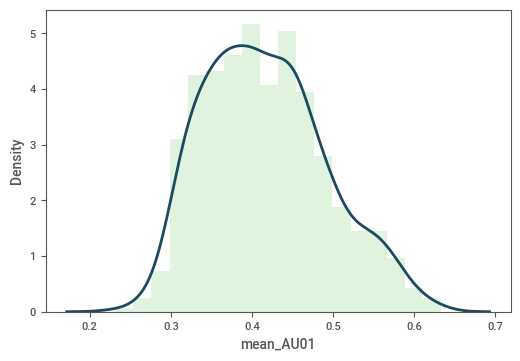

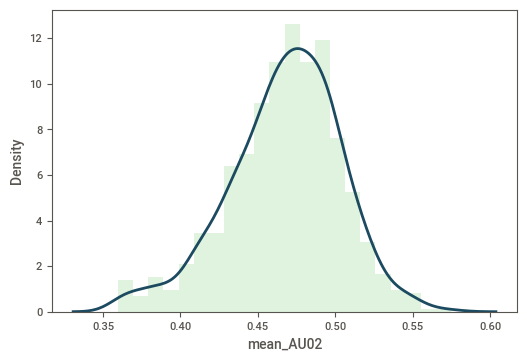

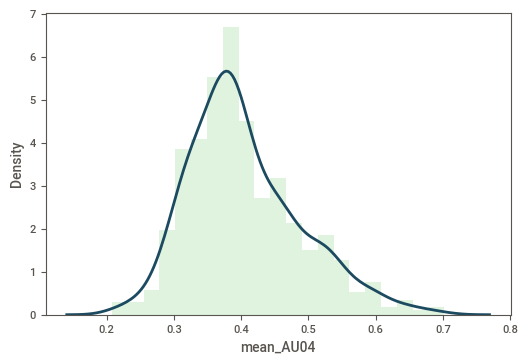

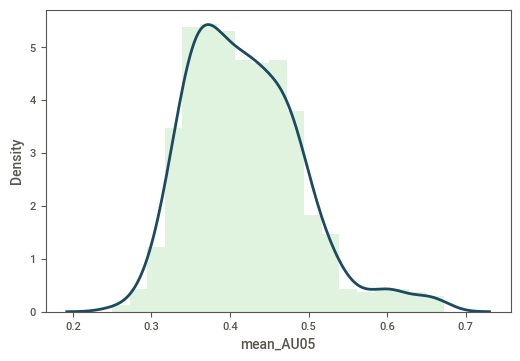

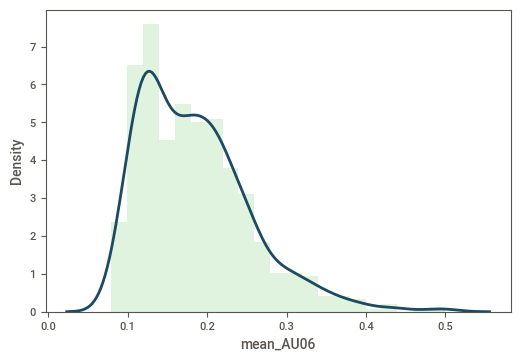

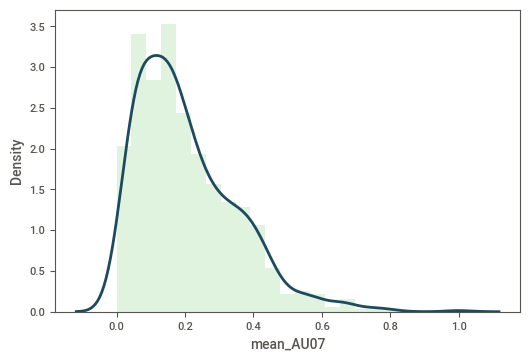

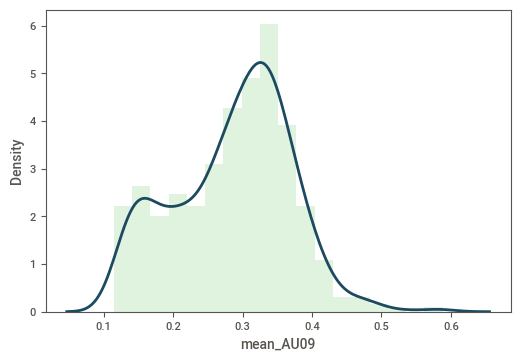

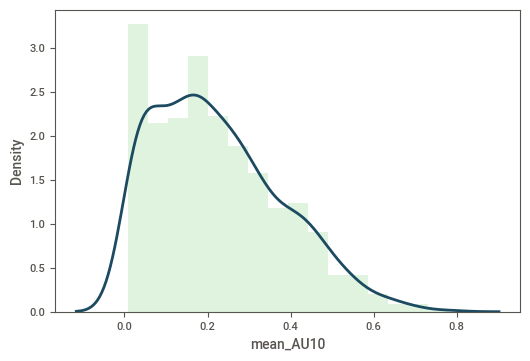

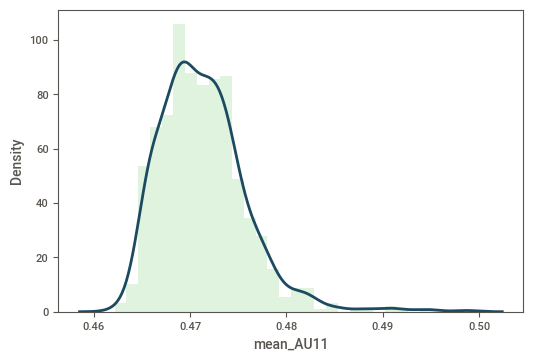

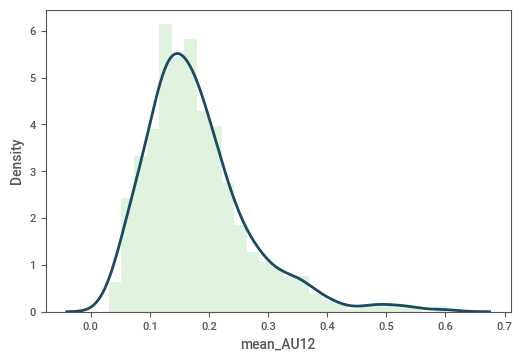

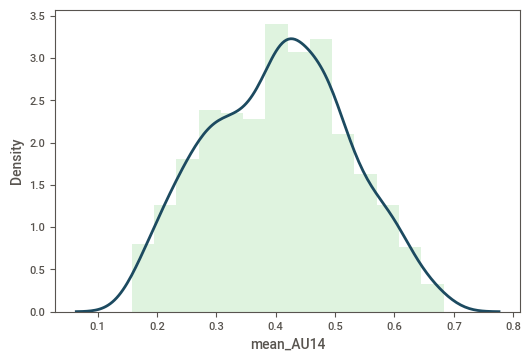

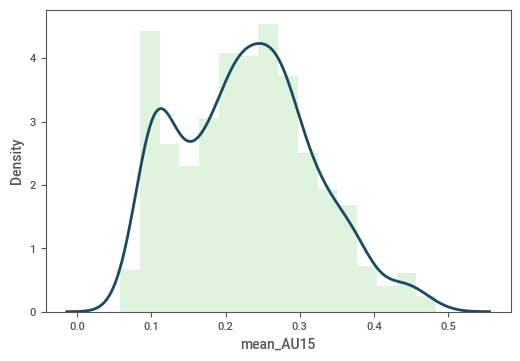

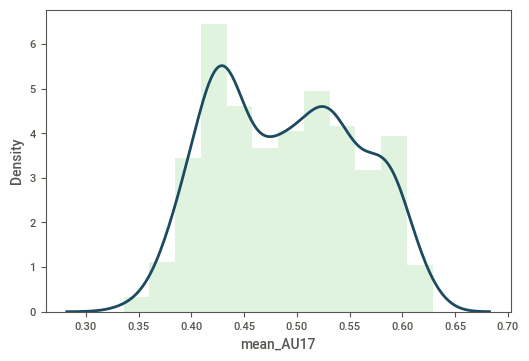

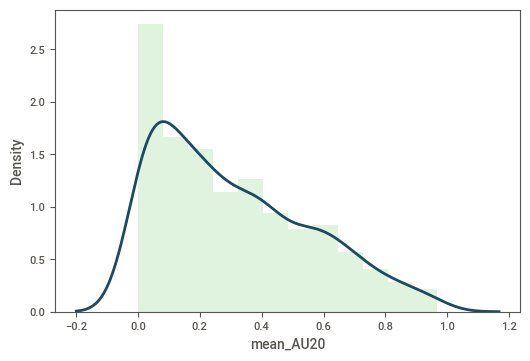

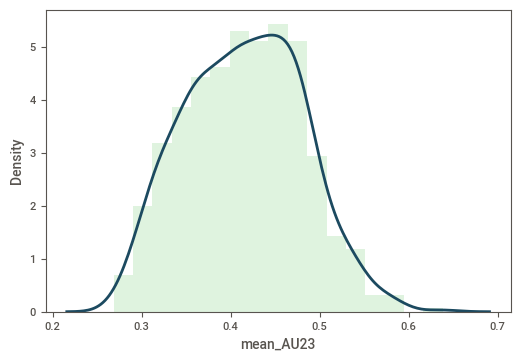

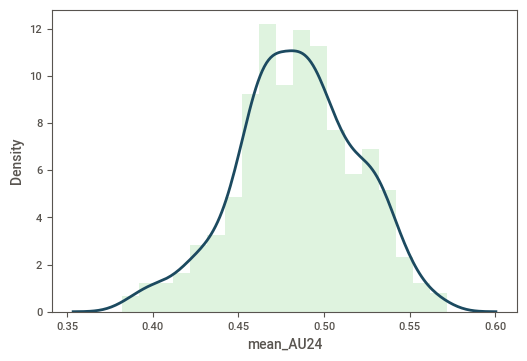

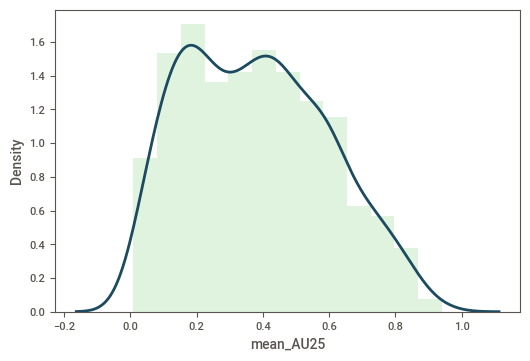

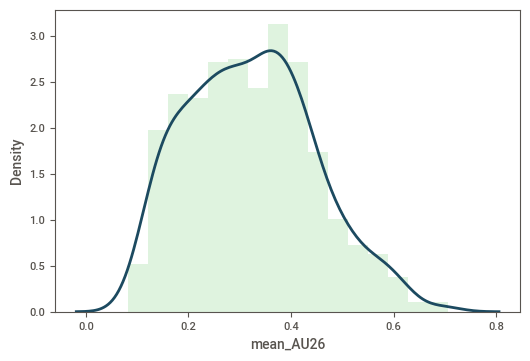

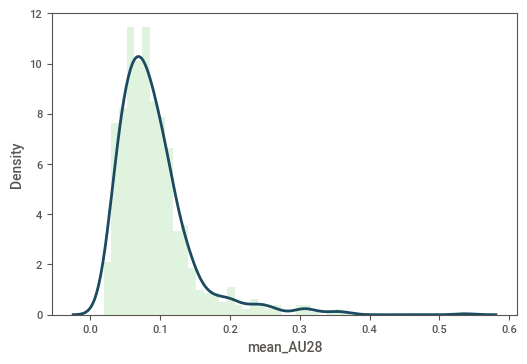

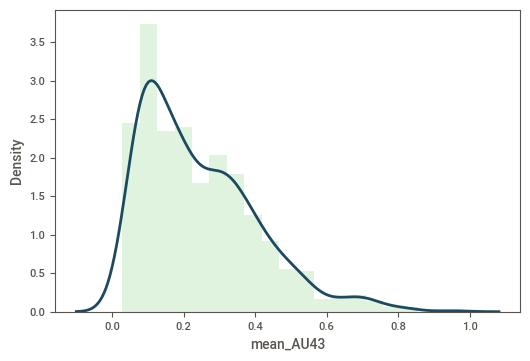

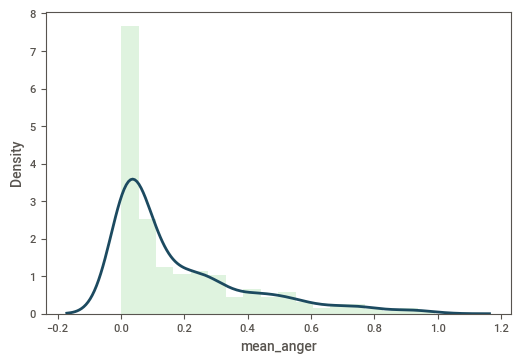

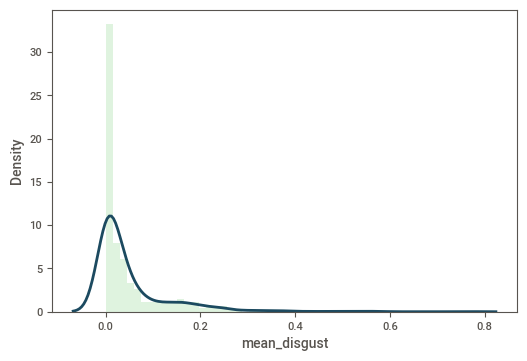

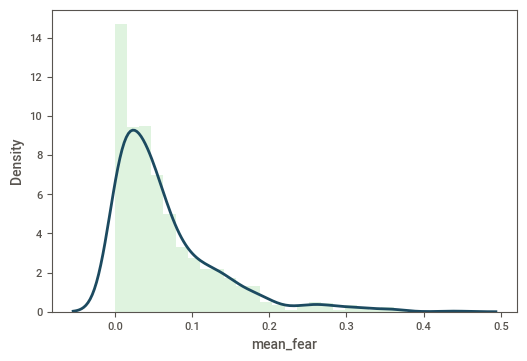

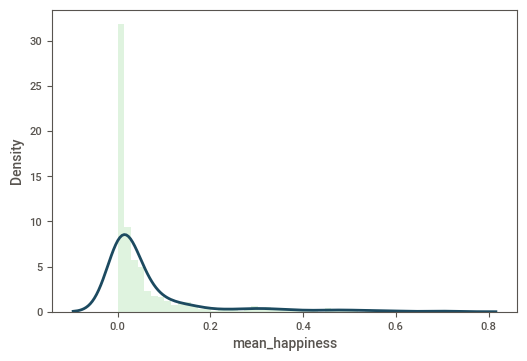

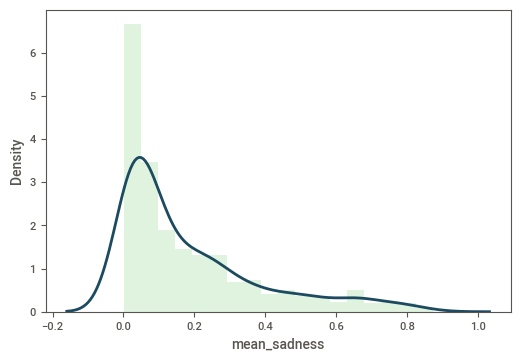

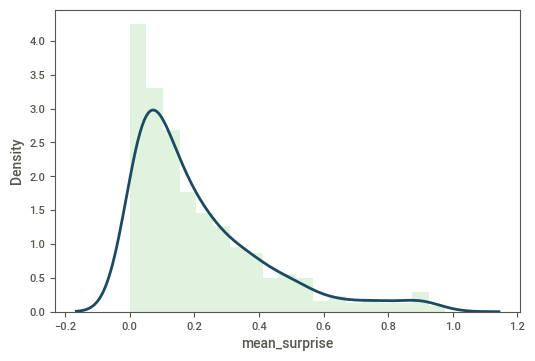

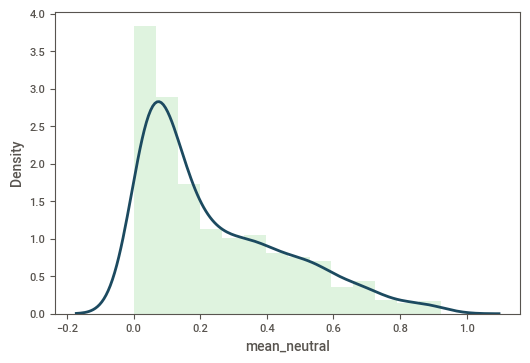

In [13]:
warnings.filterwarnings(action='ignore', category=FutureWarning)
df1 = df.select_dtypes(exclude=['object', 'category'])
for column in df1.columns:
    plt.figure()
    sns.distplot(df1[column], color="#AFE1AF", kde_kws={"color": "#1c4a60", "linewidth": 2}, label=column)
plt.show()

Let us find the correlation graphs for the most correlated parameters

In [14]:
for value in included_pairs:
    PlotGraphs.ScaterPlot(df,[df.columns.get_loc(value[0]),df.columns.get_loc(value[1])],"Correlation: " + value[0] + " v/s " + value[1])

In [15]:
df1 = df \
      .groupby("Label") \
      .agg(count=("VideoName","count"),
           Label = ("Label","first")) \
      .sort_values(by="count",ascending=False)
PlotGraphs.DonutChart(df1,0,1,"Truth v/s Lie Ratio")

Let us now compare the overall distribution of data and the distribution of data for the lie labels.

C:\Users\hinal\AppData\Local\Temp/ipykernel_6268/1882150525.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



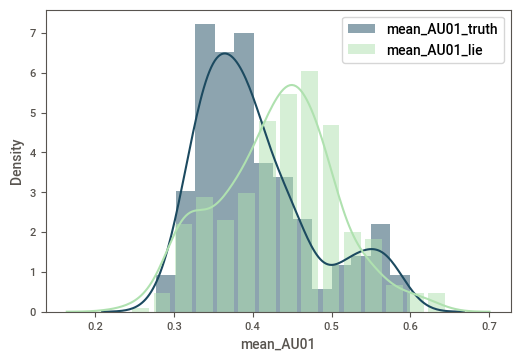

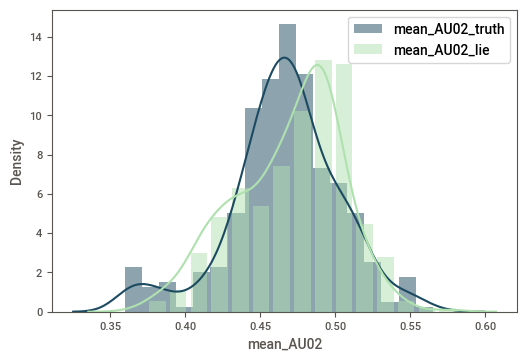

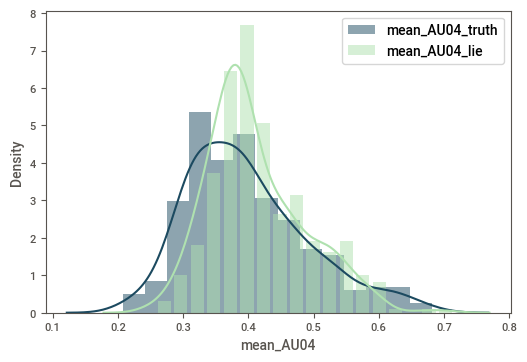

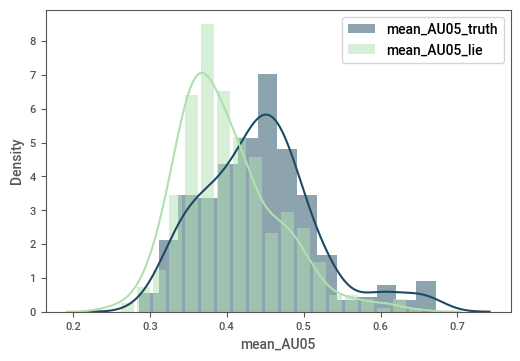

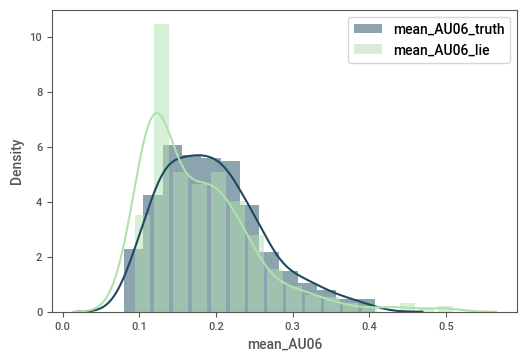

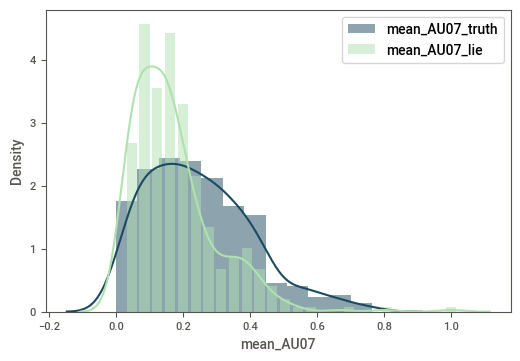

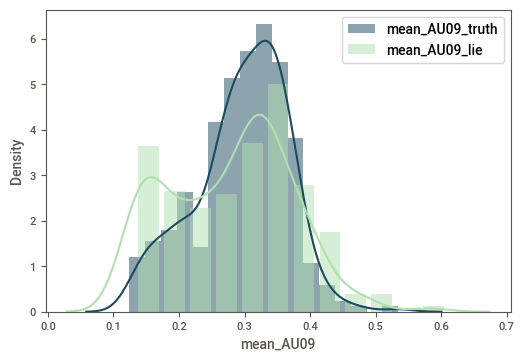

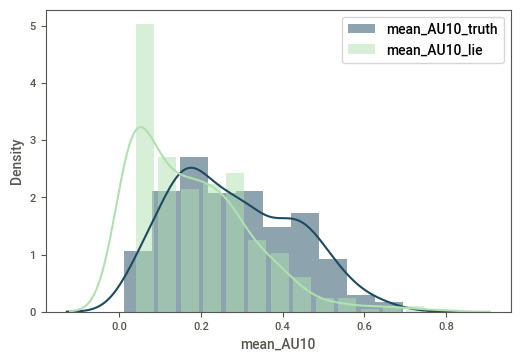

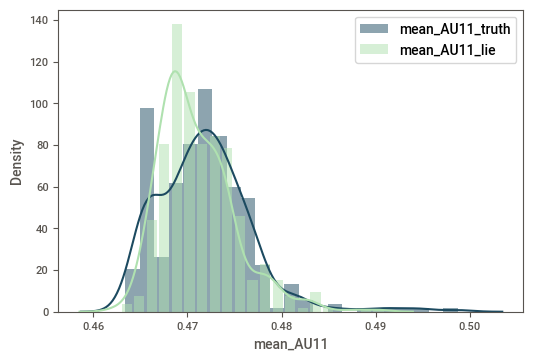

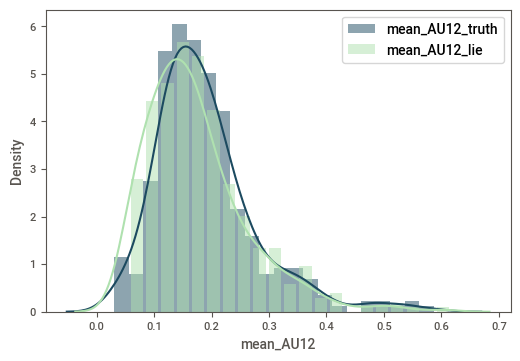

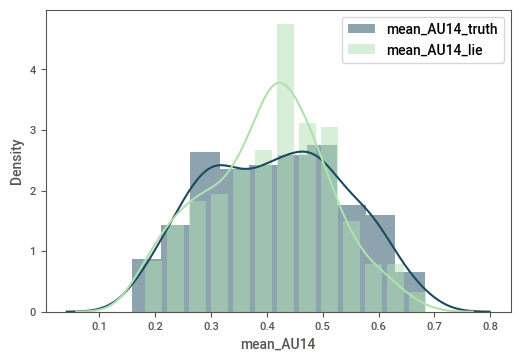

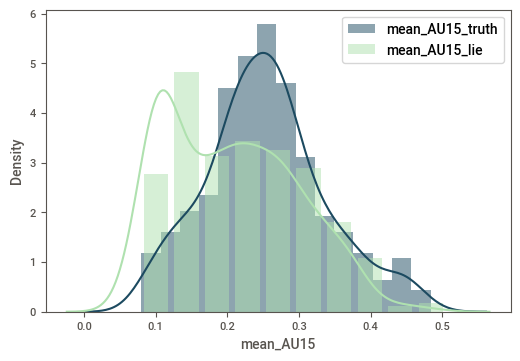

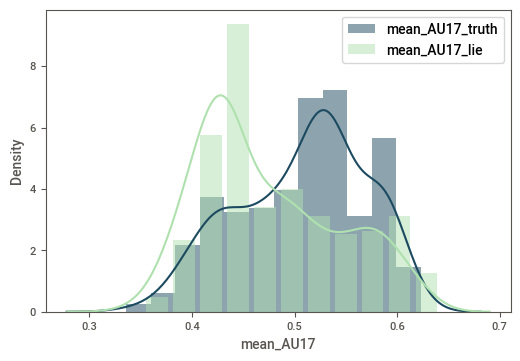

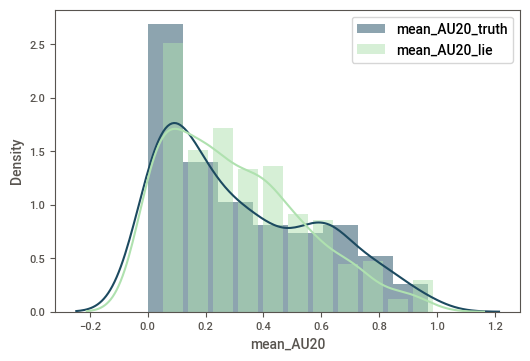

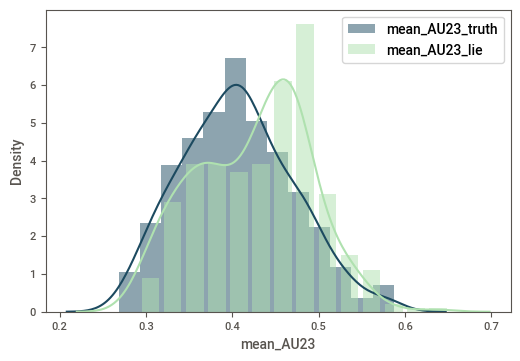

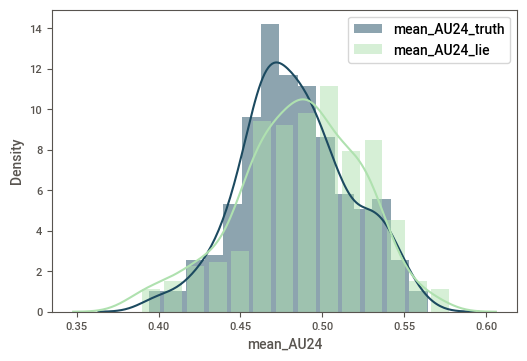

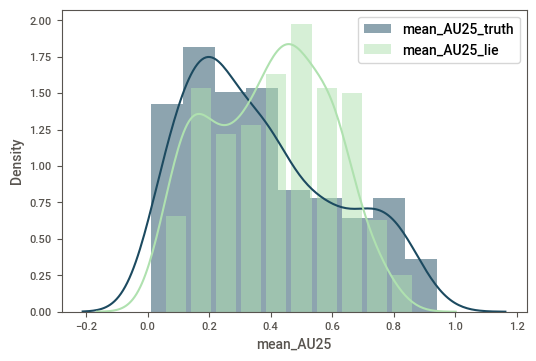

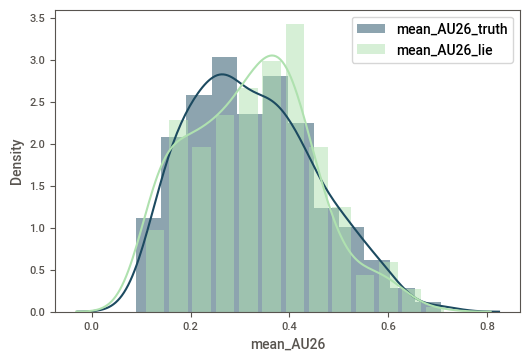

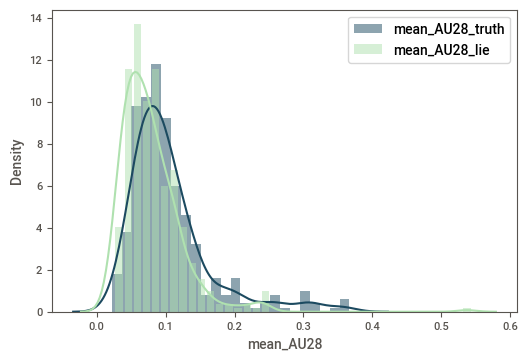

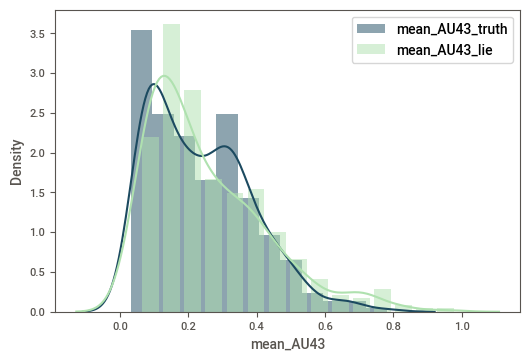

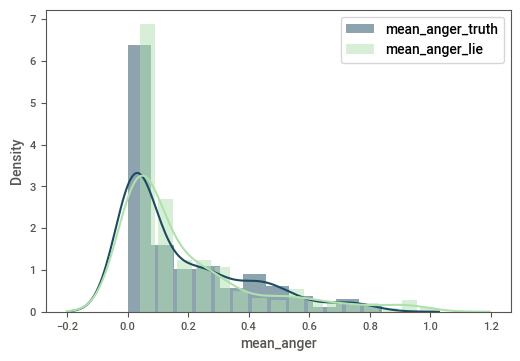

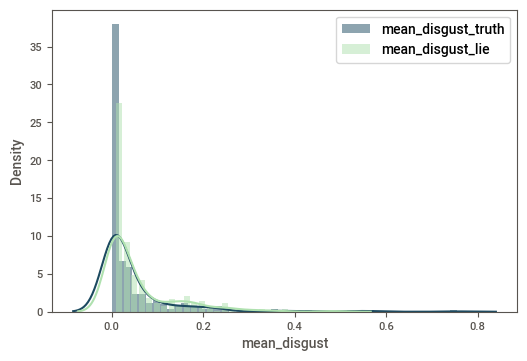

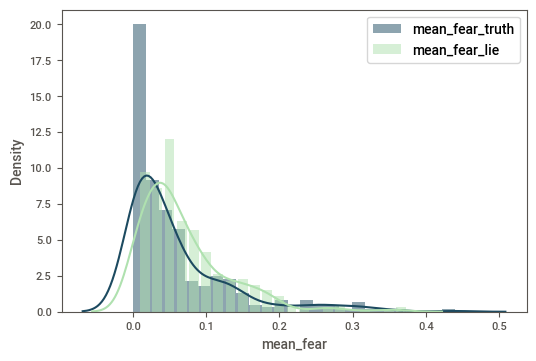

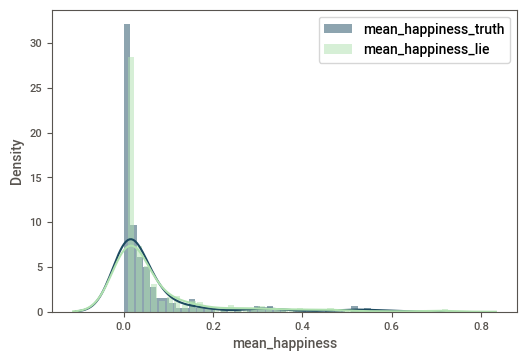

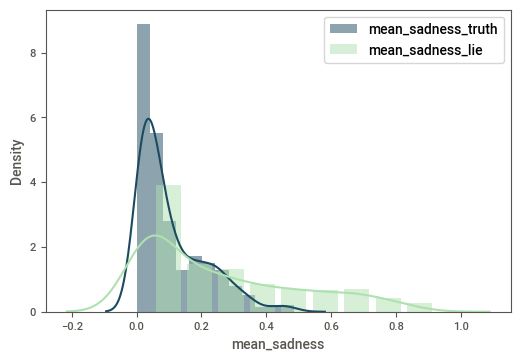

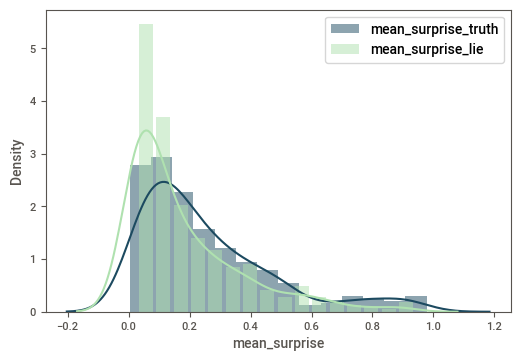

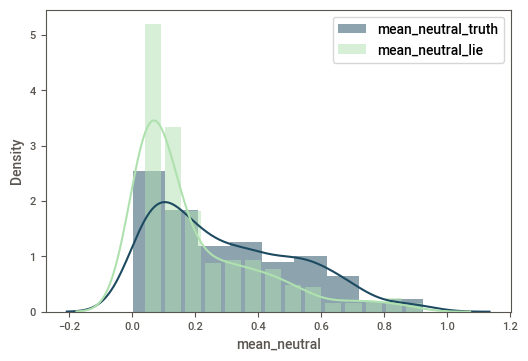

In [16]:
warnings.filterwarnings(action='ignore', category=FutureWarning)
df1 = df[df['Label'] == 'truth']
df1 = df1.select_dtypes(exclude=['object', 'category'])
df2 = df[df['Label'] == 'lie']
df2 = df2.select_dtypes(exclude=['object', 'category'])

for column in df1.columns:
    plt.figure()
    sns.distplot(df1[column], color='#1c4a60', label=column+"_truth", hist_kws={'alpha': 0.5})
    sns.distplot(df2[column], color='#AFE1AF', label=column+"_lie", hist_kws={'alpha': 0.5, 'rwidth': 0.8, 'align': 'right'})
    plt.legend()
plt.show()

Let us now see the variations of various parameters when the label is lie.

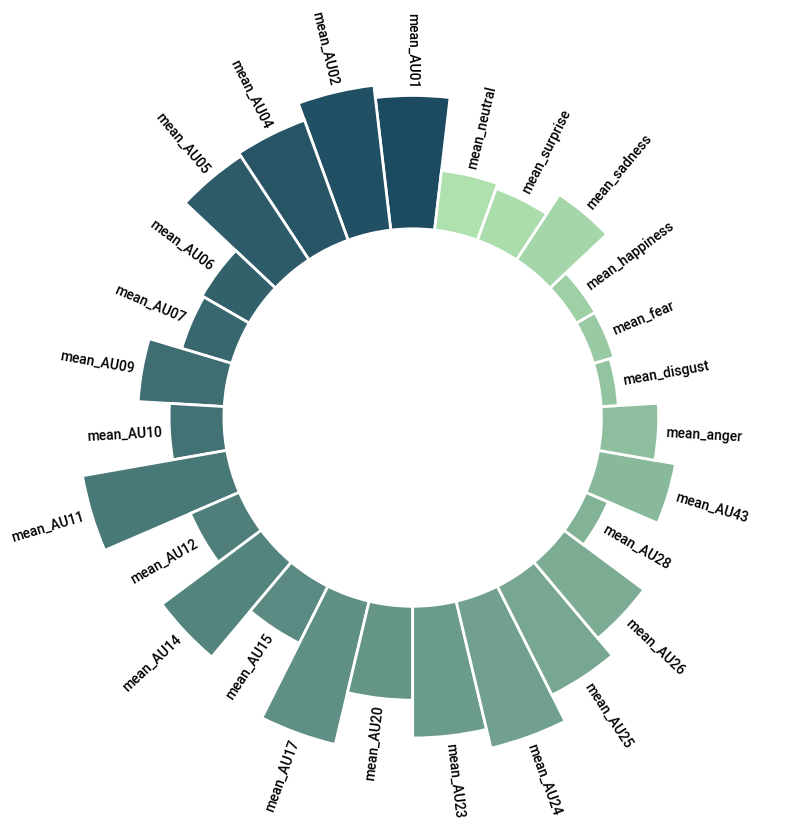

In [17]:
lie_data = df2.mean().to_frame(name='average')
lie_df = lie_data.reset_index()
PlotGraphs.CircularBarPlot(lie_df,1,0)

Let us now see the variations of various parameters when the label is lie.

In [18]:
tru_data = df1.mean().to_frame(name='average')
tru_df = tru_data.reset_index()
PlotGraphs.PolarBarPlot(tru_df,1,0,"True Label Distribution")

In [19]:
tru_df['Label'] = "Truth"
lie_df['Label'] = "Lie"
concatenated_df = pd.concat([tru_df, lie_df])
PlotGraphs.SliderBarPlot(concatenated_df,1,0,2,"Truth v/s Lie")